In [119]:
import matplotlib.pyplot as plt
import os 
import sys 
import csv
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [140]:
USAGE_STR = """

# Purpose
# Generate individual box plot distribution for each receptor condition

"""

exp_cond_dict = {
    "MOR_inactive_crystal": "MOR:inactive",
    "B2AR_inactive_crystal": "B2AR:inactive",
    "DOR_inactive_crystal": "DOR:inactive", 
    "M2R_inactive_crystal": "M2R:inactive", 
    "MOR_active_crystal": "MOR:active",
    "MOR_inactive_simulation": "MOR:inactive",
    "B2AR_inactive_simulation": "B2AR:inactive",
    "DOR_inactive_simulation": "DOR:inactive", 
    "M2R_inactive_simulation": "M2R:inactive", 
    "MOR_active_simulation": "MOR:active",
    "MOR_inactive_crystal_filtered": "MOR:inactive",
    "B2AR_inactive_crystal_filtered": "B2AR:inactive",
    "DOR_inactive_crystal_filtered": "DOR:inactive", 
    "M2R_inactive_crystal_filtered": "M2R:inactive", 
    "MOR_active_crystal_filtered": "MOR:active",
    "MOR_inactive_simulation_filtered": "MOR:inactive",
    "B2AR_inactive_simulation_filtered": "B2AR:inactive",
    "DOR_inactive_simulation_filtered": "DOR:inactive", 
    "M2R_inactive_simulation_filtered": "M2R:inactive", 
    "MOR_active_simulation_filtered": "MOR:active"
}

In [137]:
def process_table(table_path):
    """
        Process individual receptor condition frequency table
    
    """
    with open(table_path, 'rU') as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    darr = np.array(d)
    interaction = []
    freqs = []
    for row in darr:
        interaction.append(row[0])
        freqs.append(row[-1])
    return interaction[1:], map(float,freqs[1:])


def process_data(paths):
    """
        Process collection of receptor condition frequencies to compare
    """
    ec, gpcrdbpair, freqs = [], [], []
    for p in paths:
        exp_cond = exp_cond_dict[p.split("/")[-1].split(".")[0]]
        interactions, f = process_table(p)
        ec += [exp_cond]*len(interactions)
        gpcrdbpair += interactions
        freqs += f

    df = pd.DataFrame({"exp_cond": ec, "interaction": gpcrdbpair, "freq": freqs})
    return df
        

def box_plot_matplotlib(data, labels, title):
    """
        Matplotlib boxplot 
    """
    plt.figure(figsize = (12,8))
    plt.title(title, fontsize = 14)
    plt.boxplot(data)
    plt.ylabel("Water-mediated interaction frequency", fontsize = 12)
    plt.xlabel("Receptor State", fontsize = 12)
    plt.xticks(range(1, len(labels) + 1), labels, rotation="vertical")
    
def box_plot_seaborne(df, title):
    """
        Convert pandas dataframe to seaborne boxplot
    """
    
    ### Generate box and whisker plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,8))
    ax = sns.boxplot(x="exp_cond", y="freq", data=df, color="White")
    plt.title(title, fontsize=18)
    plt.ylabel("Water-mediated interaction frequency", fontsize=16)
    plt.xlabel("Receptor State", fontsize=16)
    plt.xticks(rotation=90, fontsize=14)

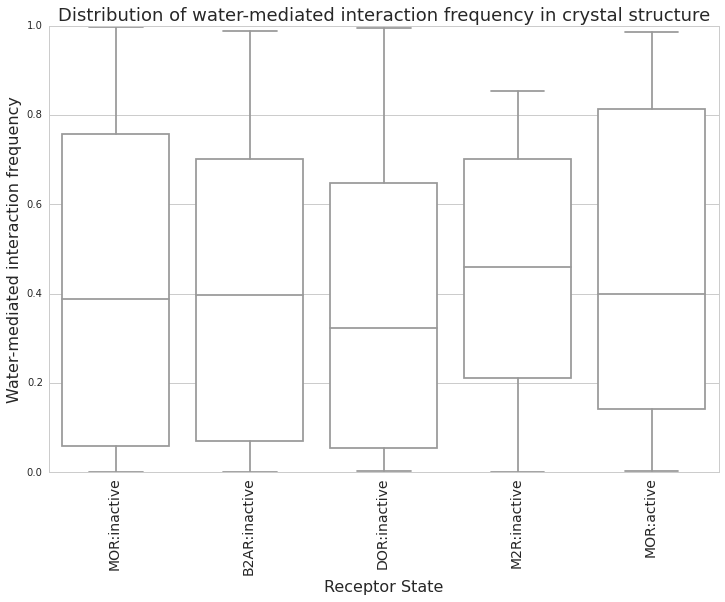

In [138]:
### Water-mediated interaction in crystal structure unfiltered
paths = ["/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_inactive/crystal/MOR_inactive_crystal.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/B2AR_inactive/crystal/B2AR_inactive_crystal.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/DOR_inactive/crystal/DOR_inactive_crystal.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/M2R_inactive/crystal/M2R_inactive_crystal.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_active/crystal/MOR_active_crystal.txt"]
df = process_data(paths)
title = "Distribution of water-mediated interaction frequency in crystal structure"
box_plot_seaborne(df, title)


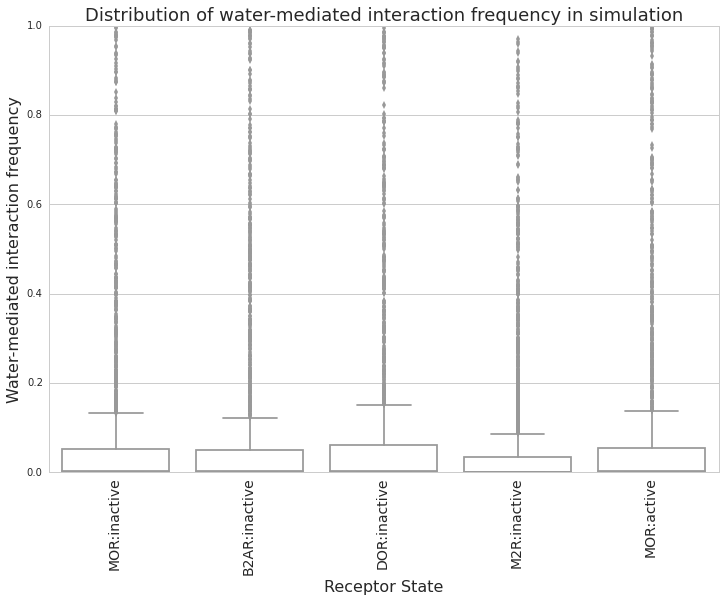

In [139]:
### Water-mediated interaction in simulation unfiltered

paths = ["/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_inactive/simulation/MOR_inactive_simulation.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/B2AR_inactive/simulation/B2AR_inactive_simulation.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/DOR_inactive/simulation/DOR_inactive_simulation.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/M2R_inactive/simulation/M2R_inactive_simulation.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_active/simulation/MOR_active_simulation.txt"]
df = process_data(paths)
title = "Distribution of water-mediated interaction frequency in simulation"
box_plot_seaborne(df, title)


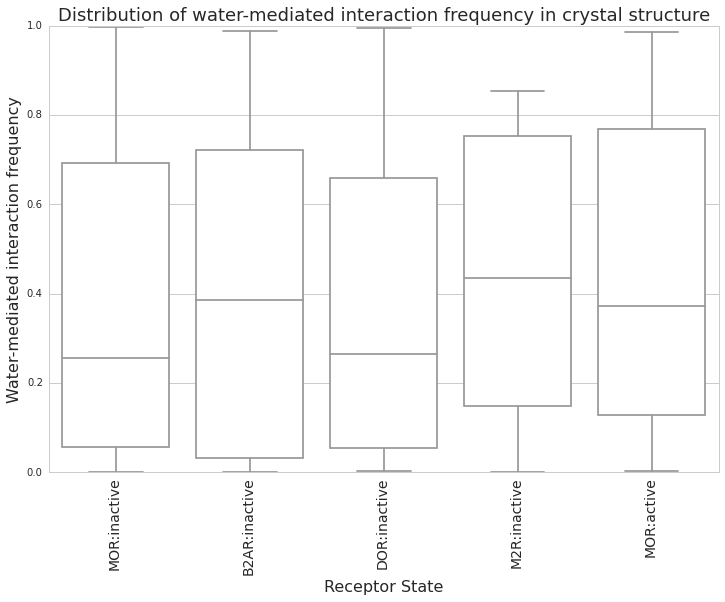

In [141]:
### Water-mediated interaction in crystal structure filtered
paths = ["/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_inactive/crystal/MOR_inactive_crystal_filtered.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/B2AR_inactive/crystal/B2AR_inactive_crystal_filtered.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/DOR_inactive/crystal/DOR_inactive_crystal_filtered.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/M2R_inactive/crystal/M2R_inactive_crystal_filtered.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_active/crystal/MOR_active_crystal_filtered.txt"]
df = process_data(paths)
title = "Distribution of water-mediated interaction frequency in crystal structure"
box_plot_seaborne(df, title)


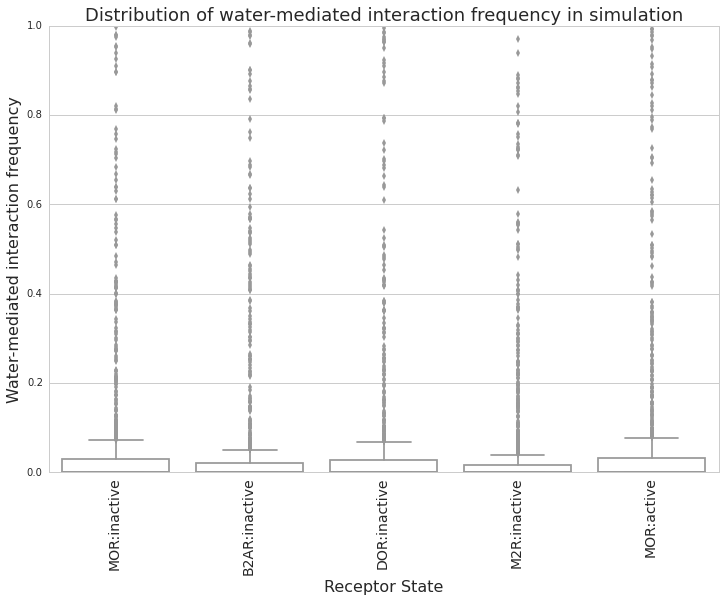

In [142]:
### Water-mediated interaction in simulation filtered

paths = ["/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_inactive/simulation/MOR_inactive_simulation_filtered.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/B2AR_inactive/simulation/B2AR_inactive_simulation_filtered.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/DOR_inactive/simulation/DOR_inactive_simulation_filtered.txt", 
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/M2R_inactive/simulation/M2R_inactive_simulation_filtered.txt",
        "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_active/simulation/MOR_active_simulation_filtered.txt"]
df = process_data(paths)
title = "Distribution of water-mediated interaction frequency in simulation"
box_plot_seaborne(df, title)


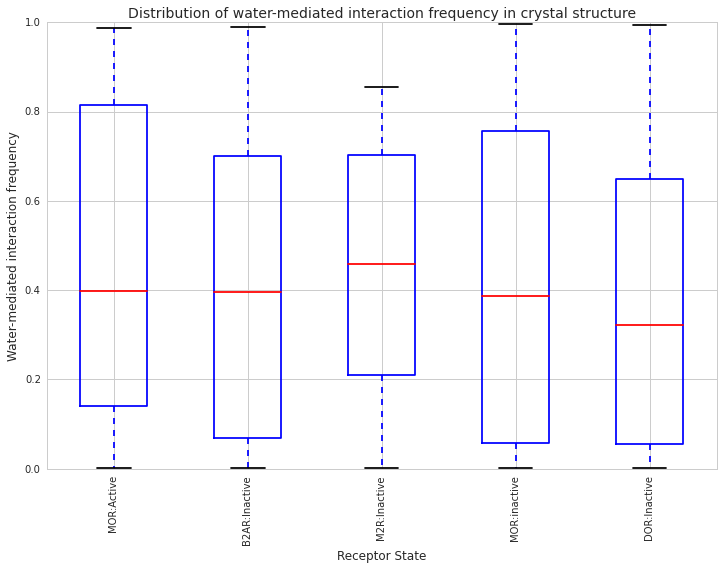

In [130]:
### Matplotlib Boxplot

b2ar_inactive_crys = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/B2AR_inactive/crystal/B2AR_inactive_crystal.txt"
n, b2ar_inactive_crys_freq = process_table(b2ar_inactive_crys)

dor_inactive_crys = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/DOR_inactive/crystal/DOR_inactive_crystal.txt"
n, dor_inactive_crys_freq = process_table(dor_inactive_crys)

m2r_inactive_crys ="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/M2R_inactive/crystal/M2R_inactive_crystal.txt"
n, m2r_inactive_crys_freq = process_table(m2r_inactive_crys)

mor_active_crys="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/033117_crystal_vs_simulation/MOR_active/crystal/MOR_active_crystal.txt"
n, mor_active_crys_freq = process_table(mor_active_crys)

crystal_data = [mor_active_crys_freq, b2ar_inactive_crys_freq, m2r_inactive_crys_freq, mor_inactive_crys_freq, dor_inactive_crys_freq]
crystal_labels = ["MOR:Active", "B2AR:Inactive", "M2R:Inactive", "MOR:inactive", "DOR:Inactive"]
title = "Distribution of water-mediated interaction frequency in crystal structure"
box_plot_matplotlib(crystal_data, crystal_labels, title)